#Elasticity of Demand

This simulation models how loan demand at a credit union may respond to changes in interest rates.

There are two hypothetical demand scenarios:
- Elastic demand (assumed price elasticity = -1.5), where borrowers are highly sensitive to rate increases.
- Inelastic demand (assumed elasticity = -0.5), where borrowers still borrow even as rates increase.

The goal is to visualize the concept of price elasticity of demand and see how different levels of sensitivity affect loan application volume.

In economics, there's a known inverse relationship between price and quantity demanded: as the price of something (like an interest rate on a loan) increases, the quantity that people demand usually decreases - and vice versa. This is called the "law of demand."

In the context of loans, higher interest rates often discourage borrowing, while lower rates can attract more applicants. This simulation shows how sensitive borrowers might be to those rate changes under different assumptions.

##Formula for Price Elasticity of Demand:

**General formula:**

$$
E = \frac{\%\ \text{Change in Quantity Demanded}}{\%\ \text{Change in Price}}
$$

**Expanded version (from two points):**

$$
E = \frac{(Q_2 - Q_1) / Q_1}{(P_2 - P_1) / P_1}
$$

Where:
- Q₁ = original quantity demanded  
- Q₂ = new quantity demanded  
- P₁ = original price (interest rate)  
- P₂ = new price

**Interpretation:**
- |E| > 1 **Elastic** – demand changes a lot  
- |E| < 1 **Inelastic** – demand changes a little  
- |E| = 1 **Unitary** – demand changes proportionally  
- E = 0 **Perfectly inelastic** – demand doesn’t change at all

This formula tells us how responsive demand is to a change in price.
If the result is greater than 1 (in absolute value), demand is elastic.
If it’s less than 1, demand is inelastic.

Elastic Demand Table (Assumed Elasticity = -1.5):


Interest Rate (%),Loan Applications (Demand),Elasticity,Elasticity Type
3.0,1000,NaN,
3.5,793,-1.242000,Elastic
4.0,649,-1.271122,Elastic
4.5,544,-1.294299,Elastic
5.0,464,-1.323529,Elastic
5.5,402,-1.336207,Elastic
6.0,353,-1.340796,Elastic
6.5,313,-1.359773,Elastic
7.0,280,-1.370607,Elastic
7.5,252,-1.400000,Elastic


Inelastic Demand Table (Assumed Elasticity = -0.5):


Interest Rate (%),Loan Applications (Demand),Elasticity,Elasticity Type
3.0,1000,NaN,
3.5,925,-0.450000,Inelastic
4.0,866,-0.446486,Inelastic
4.5,816,-0.461894,Inelastic
5.0,774,-0.463235,Inelastic
5.5,738,-0.465116,Inelastic
6.0,707,-0.462060,Inelastic
6.5,679,-0.475248,Inelastic
7.0,654,-0.478645,Inelastic
7.5,632,-0.470948,Inelastic


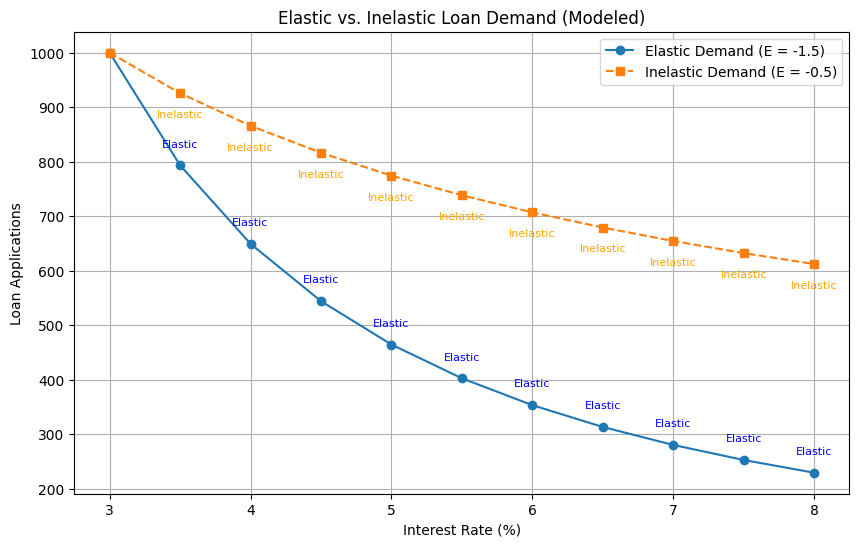

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Formula for Elasticity of Demand:
# E_d = (% Change in Quantity Demanded) / (% Change in Price)
# Or in code:
# E_d = ((Q2 - Q1) / Q1) / ((P2 - P1) / P1)
# ------------------------------------------------------------

# Simulate loan interest rates from 3.0% to 8.0%
interest_rates = np.arange(3.0, 8.1, 0.5)
base_demand = 1000  # Initial number of applications at 3.0%

# Elastic Demand Simulation (Assumed Elasticity = -1.5)
elasticity = -1.5
demand_elastic = base_demand * (interest_rates / interest_rates[0]) ** elasticity

df_elastic = pd.DataFrame({
    'Interest Rate (%)': interest_rates,
    'Loan Applications (Demand)': demand_elastic.astype(int)
})
df_elastic['Elasticity'] = np.nan
df_elastic['Elasticity Type'] = ""

# Calculate elasticity and classify responsiveness
for i in range(1, len(df_elastic)):
    Q1 = df_elastic.loc[i-1, 'Loan Applications (Demand)']
    Q2 = df_elastic.loc[i, 'Loan Applications (Demand)']
    P1 = df_elastic.loc[i-1, 'Interest Rate (%)']
    P2 = df_elastic.loc[i, 'Interest Rate (%)']

    pct_change_q = (Q2 - Q1) / Q1
    pct_change_p = (P2 - P1) / P1
    elasticity_val = pct_change_q / pct_change_p
    df_elastic.loc[i, 'Elasticity'] = elasticity_val

    abs_val = abs(elasticity_val)
    if abs_val > 1:
        label = "Elastic"
    elif abs_val == 1:
        label = "Unitary"
    elif abs_val == 0:
        label = "Perfectly Inelastic"
    else:
        label = "Inelastic"

    df_elastic.loc[i, 'Elasticity Type'] = label

from IPython.display import HTML, display

print("Elastic Demand Table (Assumed Elasticity = -1.5):")
display(HTML(df_elastic.to_html(index=False)))

# Inelastic Demand Simulation (Assumed Elasticity = -0.5)
inelasticity = -0.5
demand_inelastic = base_demand * (interest_rates / interest_rates[0]) ** inelasticity

df_inelastic = pd.DataFrame({
    'Interest Rate (%)': interest_rates,
    'Loan Applications (Demand)': demand_inelastic.astype(int)
})
df_inelastic['Elasticity'] = np.nan
df_inelastic['Elasticity Type'] = ""

# Calculate elasticity and classify responsiveness
for i in range(1, len(df_inelastic)):
    Q1 = df_inelastic.loc[i-1, 'Loan Applications (Demand)']
    Q2 = df_inelastic.loc[i, 'Loan Applications (Demand)']
    P1 = df_inelastic.loc[i-1, 'Interest Rate (%)']
    P2 = df_inelastic.loc[i, 'Interest Rate (%)']

    pct_change_q = (Q2 - Q1) / Q1
    pct_change_p = (P2 - P1) / P1
    elasticity_val = pct_change_q / pct_change_p
    df_inelastic.loc[i, 'Elasticity'] = elasticity_val

    abs_val = abs(elasticity_val)
    if abs_val > 1:
        label = "Elastic"
    elif abs_val == 1:
        label = "Unitary"
    elif abs_val == 0:
        label = "Perfectly Inelastic"
    else:
        label = "Inelastic"

    df_inelastic.loc[i, 'Elasticity Type'] = label

print("Inelastic Demand Table (Assumed Elasticity = -0.5):")
display(HTML(df_inelastic.to_html(index=False)))

# Plot Comparison
plt.figure(figsize=(10, 6))
plt.plot(interest_rates, demand_elastic, marker='o', label='Elastic Demand (E = -1.5)')
plt.plot(interest_rates, demand_inelastic, marker='s', linestyle='--', label='Inelastic Demand (E = -0.5)')

# Annotate elasticity types above the data points (elastic)
for i in range(1, len(df_elastic)):
    plt.text(interest_rates[i], demand_elastic[i] + 30,  # Offset text upward
             df_elastic['Elasticity Type'][i], fontsize=8, ha='center', va='bottom', color='blue')

# Annotate elasticity types below the data points (inelastic)
for i in range(1, len(df_inelastic)):
    plt.text(interest_rates[i], demand_inelastic[i] - 30,  # Offset text downward
             df_inelastic['Elasticity Type'][i], fontsize=8, ha='center', va='top', color='orange')

plt.title("Elastic vs. Inelastic Loan Demand (Modeled)")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Loan Applications")
plt.legend()
plt.grid(True)
plt.show()
